In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [62]:
len(data)

5106

In [3]:
data=pd.read_csv('../dataset.csv')
data.head()

,날짜,WTI,Brent,Dubai
0,2022-12-30,80.260,85.910,78.77
1,2022-12-29,78.400,82.260,78.15
2,2022-12-28,78.960,83.260,80.00
3,2022-12-27,79.530,84.330,80.63
4,2022-12-26,79.545,84.125,79.37


In [7]:
data.isnull().sum()

날짜       0
WTI      0
Brent    0
Dubai    0
dtype: int64

---
eda

In [3]:
from fbprophet import Prophet


m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(data.WTI);

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [4]:
d=data[['날짜','WTI']].copy()
d.columns=['ds','y']
d.head()

,ds,y
0,2022-12-30,80.260
1,2022-12-29,78.400
2,2022-12-28,78.960
3,2022-12-27,79.530
4,2022-12-26,79.545


In [5]:
d.ds=d.ds.astype('datetime64[ns]')

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      5106 non-null   datetime64[ns]
 1   y       5106 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 79.9 KB


In [7]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(d);

c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


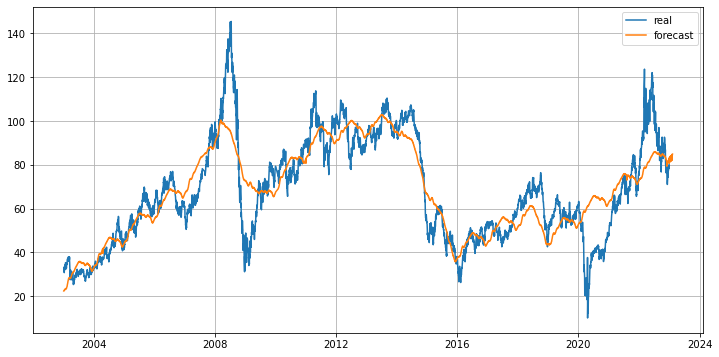

In [8]:
# m = Prophet(yearly_seasonality=True, daily_seasonality=True)
# m.fit(d);

#41일간 예측
future = m.make_future_dataframe(periods=41)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()


plt.figure(figsize=(12, 6))
plt.plot(d["ds"], d["y"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.grid(True)
plt.legend()
plt.show()

In [4]:
future_real=pd.read_csv('../2023data - 시트1.csv')
future_real.head()

,ds,WTI,Brent,Dubai
0,2023-2-28,77.05,83.89,81.92
1,2023-2-27,75.68,82.45,82.21
2,2023-2-24,76.32,83.16,82.07
3,2023-2-23,75.39,82.21,80.07
4,2023-2-22,73.95,80.60,80.83


In [10]:
future_real.ds=future_real.ds.astype('datetime64[ns]')
future_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      41 non-null     datetime64[ns]
 1   WTI     41 non-null     float64       
 2   Brent   41 non-null     float64       
 3   Dubai   41 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.4 KB


In [11]:
future_real

,ds,WTI,Brent,Dubai
0,2023-02-28,77.05,83.89,81.92
1,2023-02-27,75.68,82.45,82.21
2,2023-02-24,76.32,83.16,82.07
3,2023-02-23,75.39,82.21,80.07
4,2023-02-22,73.95,80.60,80.83
5,2023-02-21,76.16,83.05,81.91
6,2023-02-20,76.25,84.07,82.40
7,2023-02-17,76.34,83.00,82.21
8,2023-02-16,78.49,85.14,84.03
9,2023-02-15,78.59,85.38,83.31


In [12]:
len(future_real)

41

In [13]:
len(forecast)-len(data) , len(forecast)

(41, 5147)

In [18]:
yh_5125=forecast['yhat'].iloc[5106:]


In [19]:
yh_5125=yh_5125.reset_index(drop=True)


yh_5125

0     80.700398
1     83.150374
2     82.884839
3     82.905123
4     83.065760
5     83.259694
6     83.333957
7     81.190791
8     83.620917
9     83.335167
10    83.334887
11    83.474602
12    83.647244
13    83.699830
14    81.534611
15    83.942347
16    83.633951
17    83.610906
18    83.727937
19    83.878241
20    83.909172
21    81.723388
22    84.112121
23    83.786816
24    83.749535
25    83.855618
26    83.998894
27    84.027351
28    81.844258
29    84.241422
30    83.930794
31    83.914863
32    84.049285
33    84.228084
34    84.299304
35    82.166113
36    84.620050
37    84.372631
38    84.425734
39    84.634235
40    84.891218
Name: yhat, dtype: float64

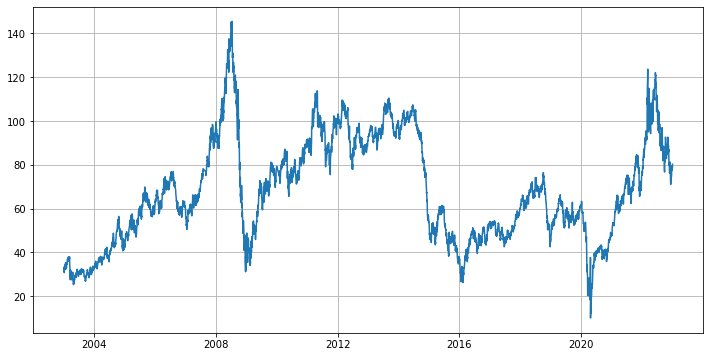

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(d["ds"], d["y"], label="real")
plt.grid(True)
plt.show()

c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


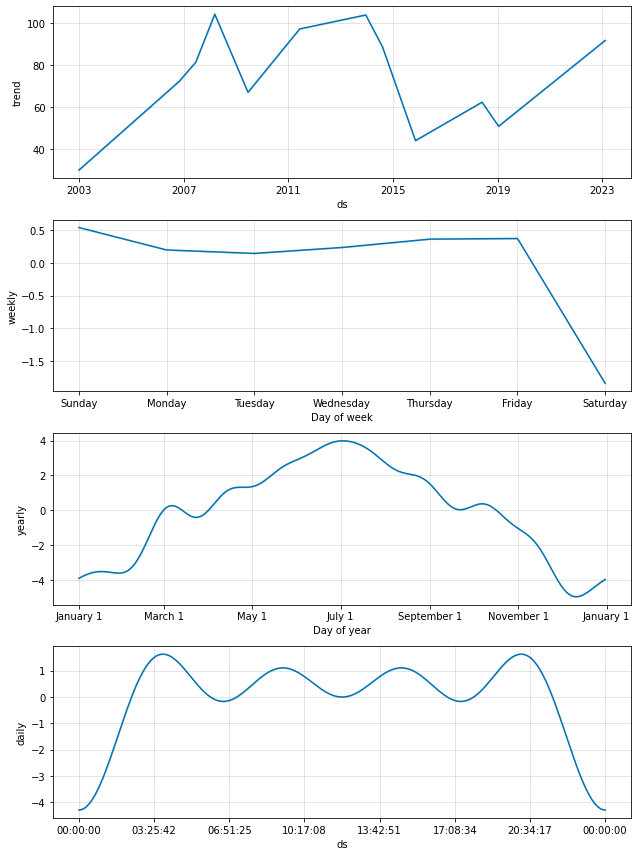

In [20]:
m.plot_components(forecast);

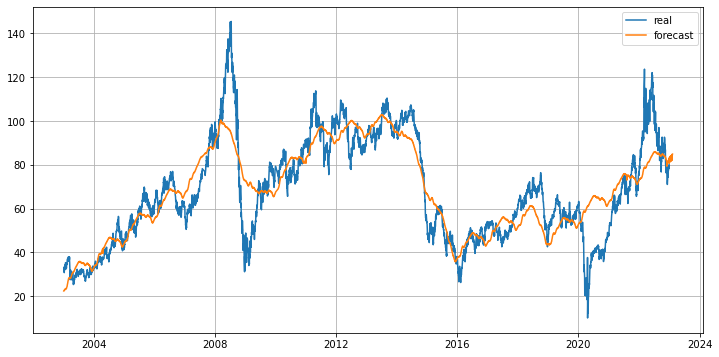

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(d["ds"], d["y"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.grid(True)
plt.legend()
plt.show()

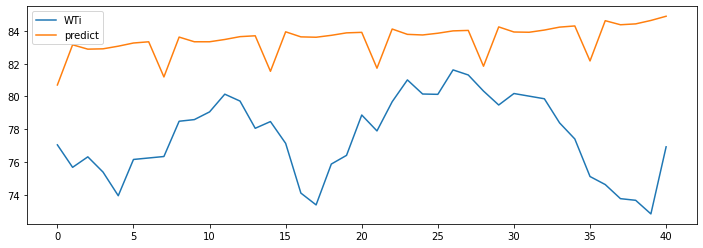

In [22]:
plt.figure(figsize=(12,4))
future_real.WTI.plot()
yh_5125.plot()
plt.legend(['WTi','predict'])

#### 정확도 높이기
2-1. Grid Search로 모델 파라미터 최적화
모델 파라미터 최적화를 위해서 Prophet 제작자들이 추천하는 파라미터의 튜닝 범위를 Grid Search 방식으로 조합하여 적용하였습니다. 사실 파라미터의 의미를 이해하기 쉽지 않은데, Grid Search를 활용하면 적절한 파라미터를 찾는 데 큰 도움이 됩니다.

Search Space 정의

Tuning 가능한 Hyperparameter는 아래 Prophet 공식 페이지에서 가이드하는 것을 참고했습니다.
* 참고 : Diagnostics

changepoint_prior_scale: chagepoint는 trend의 변화하는 크기를 반영하는 정도로 가장 효과가 크다고 말하는 파라미터입니다. 기본값은 0.05, 제작자들은 0.001~0.5 사이가 적당하다고 합니다. Log 단위로 Tuning을 하는 것을 추천합니다.   

seasonality_prior_scale: 계절성을 반영하는 단위로 기본값은 10이며, 0.01 ~ 10 사이가 적당하다고 합니다.   

holidays_prior_scale: 공휴일 효과를 반영하는 단위로 기본값은 10이며, 0.01 ~ 10 사이가 적당하다고 합니다.   
   
seasonality_mode: additive 또는 multiplicative 중에 하나를 선택하여 계절성으로 나타나는 효과를 더할지 곱할지 정하는 것입니다. 기본값은 additive이며, multiplicative로 선택하면 시간이 지남에 따라 진폭이 커지게 됩니다.   

holidays: 한국의 공휴일 정보를 담은 dataframe
참고로, 공휴일 정보를 담은 데이터 프레임은 아래의 코드로 생성할 수 있습니다.



In [79]:
import holidays

# 필요한 날짜만큼 생성
date_list = pd.date_range('2023-1-3', '2023-2-28')

# 한국 휴일 객체 생성
kr_holidays = holidays.KR()

# generate holiday table
holiday_df = pd.DataFrame(columns=['ds','holiday'])
holiday_df['ds'] = sorted(date_list)
holiday_df['holiday'] = holiday_df.ds.apply(lambda x: kr_holidays.get(x) if x in kr_holidays else 'non-holiday')

In [32]:
# Search Space 정의.

search_space = {
 'changepoint_prior_scale': [0.05, 0.1, 0.3],
 'seasonality_prior_scale': [0.05, 0.1, 5.0]
}

In [30]:
from fbprophet import Prophet
from sklearn.model_selection import ParameterGrid
import itertools

# # Prophet 모델 생성
# model = Prophet(yearly_seasonality=True, daily_seasonality=True)
# model.fit(d)

# # 파라미터 그리드 생성
# param_grid = {'changepoint_prior_scale': [0.001,0.05, 0.1, 0.5],
#               'seasonality_prior_scale': [0.05, 0.1, 3.0]}

# # 모델에 파라미터 그리드 적용

# models = []
# for params in ParameterGrid(param_grid):
#     m = model
#     m.set_params(**params)
#     models.append(m)

# # 교차 검증
# df_cv = cross_validation(models[0], initial='730 days', period='90 days', horizon='365 days')
# df_p = performance_metrics(df_cv)

# # 최적 파라미터 선택
# best_params = param_grid[np.argmax(df_p['rmse'].values)]


In [26]:
params_grid = {'changepoint_prior_scale': [0.05, 0.1, 0.3],
 'seasonality_prior_scale': [0.05, 0.1, 5.0]}
 
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 9


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


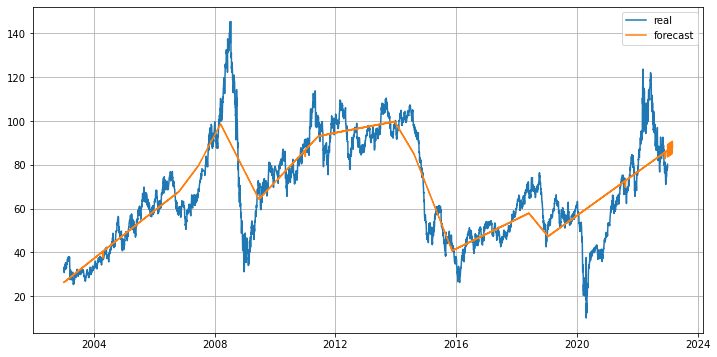

In [27]:
m = Prophet(yearly_seasonality=0.5)
m.fit(d);

#60일간 예측
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()


plt.figure(figsize=(12, 6))
plt.plot(d["ds"], d["y"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.grid(True)
plt.legend()
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


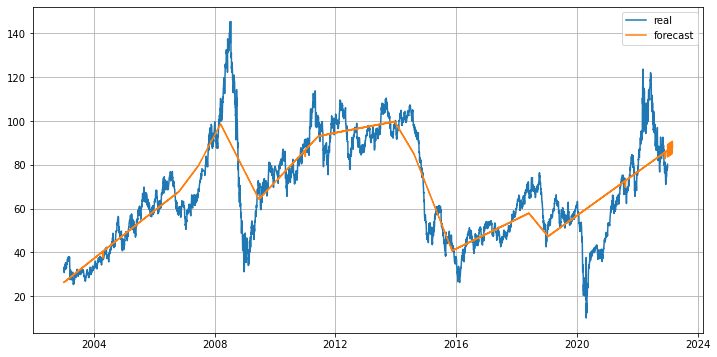

In [101]:
m = Prophet(yearly_seasonality=0.001)
m.fit(d);

#60일간 예측
future = m.make_future_dataframe(periods=41)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()


plt.figure(figsize=(12, 6))
plt.plot(d["ds"], d["y"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.grid(True)
plt.legend()
plt.show()

In [33]:

from fbprophet.diagnostics import cross_validation, performance_metrics

param_combined = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

mapes = []
for param in param_combined:
   print('params', param)
   _m = Prophet(**param)

   _m.fit(d)
   _cv_df = cross_validation(_m, initial='730 days', period='90 days', horizon='30 days', parallel='processes')
   _df_p = performance_metrics(_cv_df, rolling_window=1)
   mapes.append(_df_p['mape'].values[0])

tuning_results = pd.DataFrame(param_combined)
tuning_results['mapes'] = mapes

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


params {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.05}


c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 73 forecasts with cutoffs between 2005-03-04 00:00:00 and 2022-11-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001FEA7877820>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


params {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.1}


c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 73 forecasts with cutoffs between 2005-03-04 00:00:00 and 2022-11-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001FEA7877BE0>


In [ ]:
aaaaa

---

In [34]:
# 1. 정상성 확인
from statsmodels.tsa.stattools import adfuller
adfuller(d2['WTI'])

#p-value= 0.06 귀무가설 채택 가능성 높음 > 안정성 뛰고 있지 않음 

(-2.769162427716936,
 0.062815496691501,
 25,
 5080,
 {'1%': -3.4316379148442406,
  '5%': -2.8621091210661658,
  '10%': -2.567072943494637},
 19424.810745381103)

In [35]:
#2.ACF, PACF확인
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
#자기상관관계 : 현재의 상태가 과거&미래와 밀접한 관련이 있는 경우 -> 시간의 흐름에 따라 독립적이지 않음
#자기상관함수 acf : 시간에 따른 상관 정도를 나타냄

#부분자기상관계수 : 시간의 효과(추세,trend)를 제거한 상관계수
#   ex) 신발판매량 - 범죄발생건수 상관계수 p=1 일 때, 시간경과>인구 증가>신발판매증가>범죄증가
#       즉, 시간의 효과를 제거해야함



c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


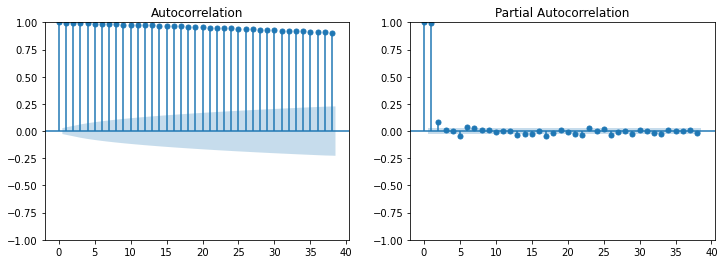

In [36]:
# 시각화
# subplot생성
fig, ax = plt.subplots(1,2 , figsize = (12,4))

# acf plot #자기상관성(자기상관함수) : 모두 양수
plot_acf(d2['WTI'], ax = ax[0])

# pacf plot  부분자기상관성(부분자기상관계수)
plot_pacf(d2['WTI'], ax= ax[1])
plt.show()

In [ ]:
acf : 매우 천천히 correlation이 내려가고 신뢰구간 안에 들어가지도 못함 > 안정적이지 않음
PACF : 시차 차이가 1인 것까지 correlation이 높은것을 볼 수 있음  > p=1


- 차분이란, 현시점 데이터에서 d시점 이전에 데이터를 뺀것으로서 정상성을 만족하지 않을때 만족하게 바꾸기 위한 방법중 하나.
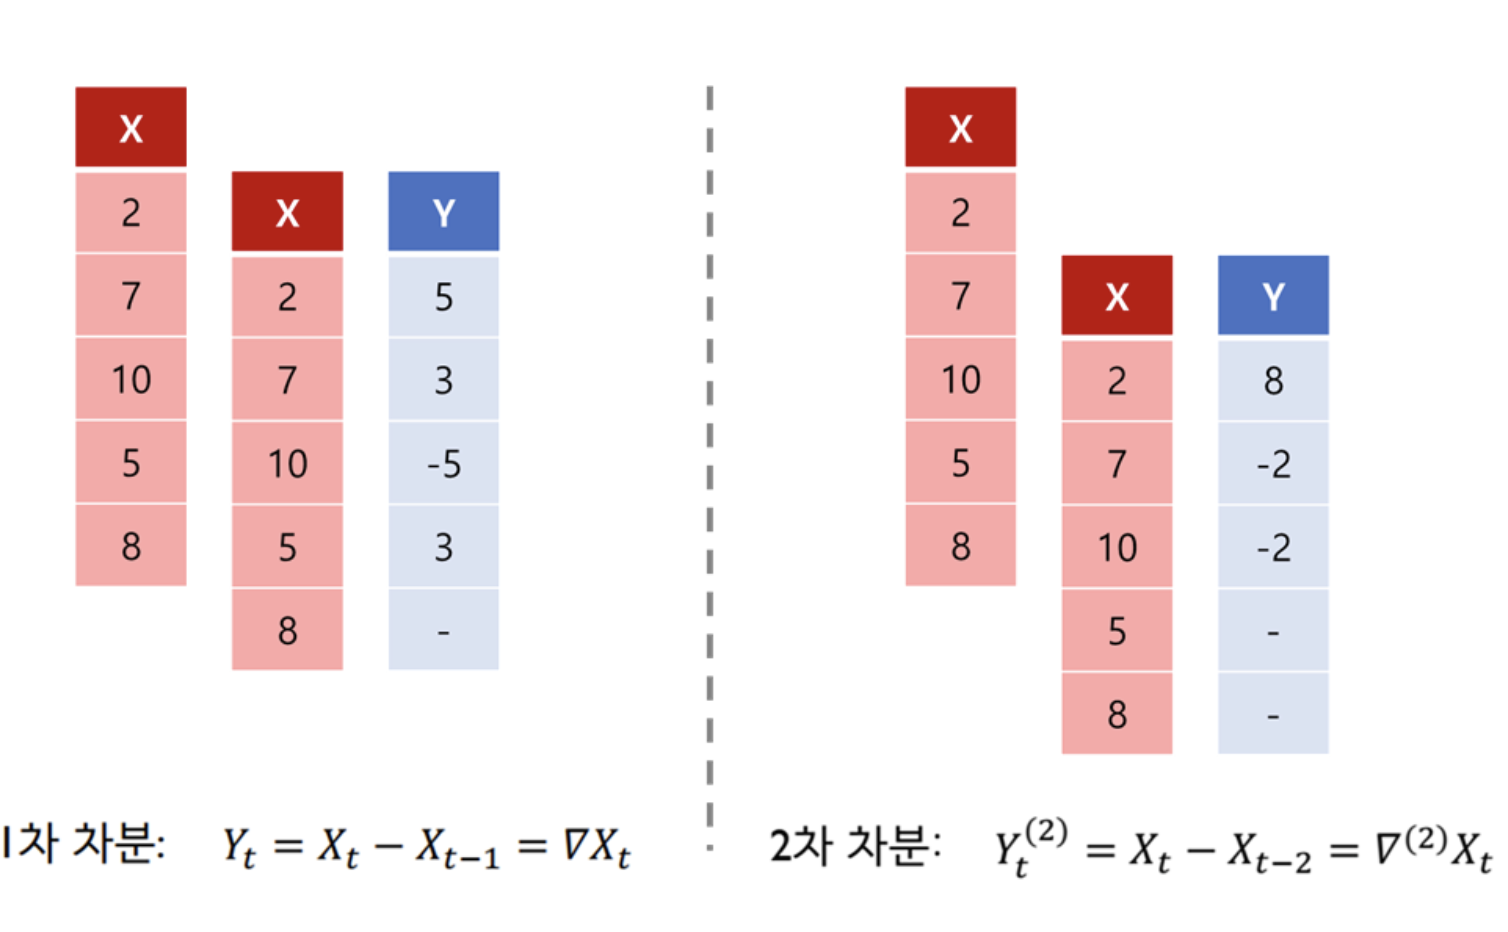

c:\Users\user\Anaconda3\envs\ds_study\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


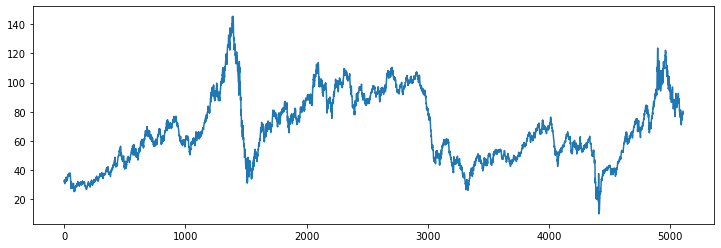

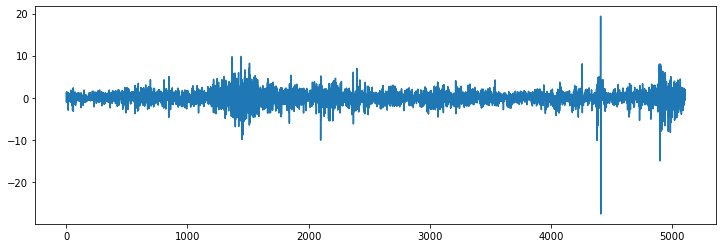

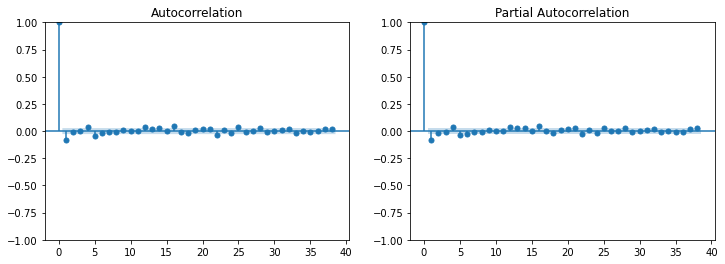

In [37]:
#1차 차분
plt.figure(figsize=(12.2,4))
plt.plot(d2.WTI)

diff_1=d2['WTI'].diff(periods=1).iloc[1:]
plt.figure(figsize=(12.2,4))
diff_1.plot()

fig, ax = plt.subplots(1,2 , figsize = (12,4))
plot_acf(diff_1, ax = ax[0])
plot_pacf(diff_1, ax= ax[1])

plt.show()

In [23]:
# 1차 차분 결과 평균이 비교적 일정하게 보임, 1차 차분이 적절하다 판단 d=1

In [38]:
model = pm.auto_arima(y = d2['WTI']        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )


# auto_arima에 주요한 옵션들을 설명하면 다음과 같습니다. 더 자세한 설명은 공식 가이드를 참조바랍니다.

# y: array 형태의 시계열 자료
# d (기본값 = none): 차분의 차수, 이를 지정하지 않으면 실행 기간이 매우 길어질 수 있음
# start_p (기본값 = 2), max_p (기본값 = 5): AR(p)를 찾을 범위 (start_p에서 max_p까지 찾는다!)
# start_q (기본값 = 2), max_q (기본값 = 5): AR(q)를 찾을 범위 (start_q에서 max_q까지 찾는다!)
# m (기본값 = 1): 계절적 차분이 필요할 때 쓸 수 있는 모수로 m=4
# 이면 분기별, m=12
# 면 월별, m=1
# 이면 계절적 특징을 띠지 않는 데이터를 의미한다. m=1이면 자동적으로 seasonal 에 대한 옵션은 False로 지정된다.
# seasonal (기본값 = True): 계절성 ARIMA 모형을 적합할지의 여부
# stepwise (기본값 = True): 최적의 모수를 찾기 위해 쓰는 힌드만 - 칸다카르 알고리즘을 사용할지의 여부, False면 모든 모수 조합으로 모형을 적합한다.
# trace (기본값 = False): stepwise로 모델을 적합할 때마다 결과를 프린트하고 싶을 때 사용한다.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19583.647, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19552.670, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19551.909, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19581.815, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19553.648, Time=0.68 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=19553.619, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19554.175, Time=1.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=19550.108, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=19551.850, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=19551.820, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=19550.866, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=19552.372, Time=0.57 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.032 seconds


In [ ]:
ARIMA(0,1,1)(0,0,0)[0] 

In [39]:
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5106
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -9773.054
Date:                Wed, 19 Apr 2023   AIC                          19550.108
Time:                        06:14:04   BIC                          19563.184
Sample:                             0   HQIC                         19554.686
                               - 5106                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0820      0.006    -13.608      0.000      -0.094      -0.070
sigma2         2.6938      0.021    131.104      0.000       2.654       2.734
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [ ]:
# Ljung-Box (Q) / Heteroskedasticity (H) / Jarque-Bera (JB)에 대한 부분은 모두 잔차에 대한 검정 통계량들입니다.
# Ljung-Box (Q) 융-박스 검정 통계량는 잔차가 백색잡음인지 검정한 통계량입니다.

# Prob (Q) 값을 보면 0.65이므로 유의수준 0.05에서 귀무가설을 기각하지 못합니다. Ljung-Box (Q) 통계량의 귀무가설은 “잔차(residual)가 백색잡음(white noise) 시계열을 따른다”이므로, 위 결과를 통해 시계열 모형이 잘 적합되었고 남은 잔차는 더이상 자기상관을 가지지 않는 백색 잡음임을 확인할 수 있습니다.

# Jarque-Bera (JB) 자크-베라 검정 통계량은 잔차가 정규성을 띠는지 검정한 통계량입니다.

# Prob(JB)값을 보면 0.00으로 유의 수준 0.05에서 귀무가설을 기각합니다. Jarque-Bera (JB) 통계량의 귀무가설은 “잔차가 정규성을 만족한다”이므로, 위 결과를 통해 “잔차가 정규성을 따르지 않음”을 확인할 수 있습니다.

# Heteroskedasticity (H) 이분산성 검정 통계량은 잔차가 이분산을 띠지 않는지 검정한 통계량입니다.

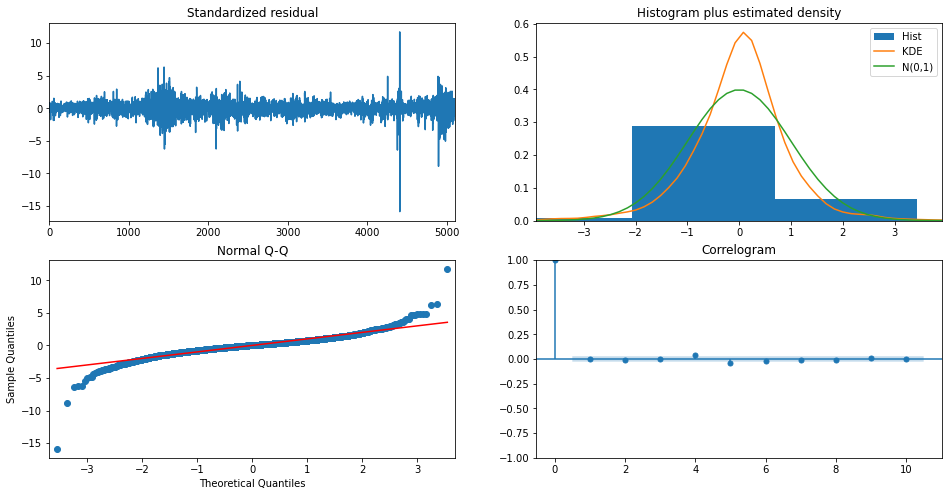

In [40]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [18]:
d2=pd.read_csv('../dataset2.csv')
d2.head()

,day,WTI,Brent,Dubai
0,2003-01-02,32.03,30.31,26.88
1,2003-01-03,33.22,31.74,27.56
2,2003-01-06,32.16,31.34,27.56
3,2003-01-07,31.20,30.31,26.62
4,2003-01-08,30.72,28.56,26.33


In [41]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [42]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in future_real['WTI']:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [52]:
future_real=pd.read_csv('../2023data - 시트1.csv')
future_real.head(2)

,ds,WTI,Brent,Dubai
0,2023-01-03,76.93,82.10,82.07
1,2023-01-04,72.84,77.84,77.10


In [53]:
future_real.columns=['day','WTI','Brent','Dubai']
future_real.head(2)

,day,WTI,Brent,Dubai
0,2023-01-03,76.93,82.10,82.07
1,2023-01-04,72.84,77.84,77.10


In [50]:
len(d2)

5106

In [47]:
d2.head(2)

,day,WTI,Brent,Dubai
0,2003-01-02,32.03,30.31,26.88
1,2003-01-03,33.22,31.74,27.56


In [54]:
d3 = pd.concat([d2,future_real])
d3.head()

,day,WTI,Brent,Dubai
0,2003-01-02,32.03,30.31,26.88
1,2003-01-03,33.22,31.74,27.56
2,2003-01-06,32.16,31.34,27.56
3,2003-01-07,31.20,30.31,26.62
4,2003-01-08,30.72,28.56,26.33


In [55]:
test=d3.iloc[5106:]
test.head(2)

,day,WTI,Brent,Dubai
0,2023-01-03,76.93,82.10,82.07
1,2023-01-04,72.84,77.84,77.10


In [43]:
pd.DataFrame({"test": future_real['WTI'], "pred": y_pred})

,test,pred
0,77.05,80.111485
1,75.68,77.302317
2,76.32,75.813084
3,75.39,76.278366
4,73.95,75.463007
5,76.16,74.074191
6,76.25,75.988318
7,76.34,76.228472
8,78.49,76.330824
9,78.59,78.312384


In [44]:
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5147
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -9848.174
Date:                Wed, 19 Apr 2023   AIC                          19700.347
Time:                        06:14:35   BIC                          19713.439
Sample:                             0   HQIC                         19704.929
                               - 5147                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0814      0.006    -13.523      0.000      -0.093      -0.070
sigma2         2.6902      0.020    131.320      0.000       2.650       2.730
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [68]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = d2['WTI'].index, y = d2['WTI'], name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = test.index+5106, y = test['WTI'], name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = test.index+5106, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
])
    
#     # 신뢰 구간---------------------------------------------------------
#     , go.Scatter(x = test.index.tolist() + y_test.index[::-1].tolist() 
#                 ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
#                 ,fill='toself'
#                 ,fillcolor='rgba(0,0,30,0.1)'
#                 ,line=dict(color='rgba(0,0,0,0)')
#                 ,hoverinfo="skip"
#                 ,showlegend=False)
# ])

fig.update_layout(height=400, width=1000, title_text="ARIMA(0,1,0)모형")
fig.show()

In [64]:
test.head(2)

,day,WTI,Brent,Dubai
0,2023-01-03,76.93,82.10,82.07
1,2023-01-04,72.84,77.84,77.10


In [67]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # # # 훈련 데이터-------------------------------------------------------
    # # go.Scatter(x = d2['WTI'].index, y = d2['WTI'], name = "Train", mode = 'lines'
    # #           ,line=dict(color = 'royalblue'))

    # 예측값-----------------------------------------------------------
    go.Scatter(x = test.index+5106, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))

    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = test.index+5106, y = test['WTI'], name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(0,1,0)모형")
fig.show()